In [54]:
import numpy as np
from make_dataset import load_data_spiral
from optimizer import SGD
from layers import Affine, SoftmaxWithLoss

In [2]:
import matplotlib.pyplot as plt

In [72]:
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

In [73]:
x,t = load_data_spiral()

In [74]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # 가중치와 편향 초기화
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)

        # 계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

In [75]:
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)

In [76]:
optimizer = SGD(lr=learning_rate)

In [77]:
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []


In [78]:
for epoch in range(max_epoch):
    # 데이터 뒤섞기
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

        # 기울기를 구해 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        # 정기적으로 학습 경과 출력
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| 에폭 %d |  반복 %d / %d | 손실 %.2f'
                  % (epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

| 에폭 1 |  반복 10 / 10 | 손실 1.17
| 에폭 2 |  반복 10 / 10 | 손실 1.13
| 에폭 3 |  반복 10 / 10 | 손실 1.14
| 에폭 4 |  반복 10 / 10 | 손실 1.15
| 에폭 5 |  반복 10 / 10 | 손실 1.13
| 에폭 6 |  반복 10 / 10 | 손실 1.15
| 에폭 7 |  반복 10 / 10 | 손실 1.12
| 에폭 8 |  반복 10 / 10 | 손실 1.14
| 에폭 9 |  반복 10 / 10 | 손실 1.13
| 에폭 10 |  반복 10 / 10 | 손실 1.10
| 에폭 11 |  반복 10 / 10 | 손실 1.11
| 에폭 12 |  반복 10 / 10 | 손실 1.09
| 에폭 13 |  반복 10 / 10 | 손실 1.06
| 에폭 14 |  반복 10 / 10 | 손실 1.05
| 에폭 15 |  반복 10 / 10 | 손실 1.00
| 에폭 16 |  반복 10 / 10 | 손실 0.96
| 에폭 17 |  반복 10 / 10 | 손실 0.92
| 에폭 18 |  반복 10 / 10 | 손실 0.90
| 에폭 19 |  반복 10 / 10 | 손실 0.88
| 에폭 20 |  반복 10 / 10 | 손실 0.85
| 에폭 21 |  반복 10 / 10 | 손실 0.83
| 에폭 22 |  반복 10 / 10 | 손실 0.79
| 에폭 23 |  반복 10 / 10 | 손실 0.80
| 에폭 24 |  반복 10 / 10 | 손실 0.80
| 에폭 25 |  반복 10 / 10 | 손실 0.80
| 에폭 26 |  반복 10 / 10 | 손실 0.78
| 에폭 27 |  반복 10 / 10 | 손실 0.78
| 에폭 28 |  반복 10 / 10 | 손실 0.77
| 에폭 29 |  반복 10 / 10 | 손실 0.77
| 에폭 30 |  반복 10 / 10 | 손실 0.78
| 에폭 31 |  반복 10 / 10 | 손실 0.77
| 에폭 32 |  반복 10 

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-pack

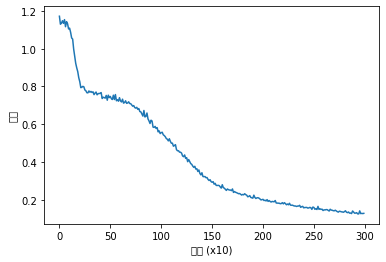

In [79]:
# 학습 결과 플롯
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('반복 (x10)')
plt.ylabel('손실')
plt.show()


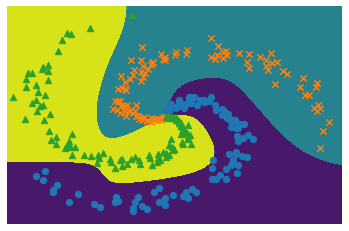

In [80]:
# 경계 영역 플롯
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')
# 데이터점 플롯
x, t = load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()